# Entri_MOD_5_Assignment_1

### Importing libraries

In [263]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading Data

In [265]:
data = pd.read_csv("house_price.csv", encoding_errors="ignore")
data

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


### Understand the data

In [267]:
data.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [268]:
data.shape

(13200, 7)

In [269]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        13200 non-null  object 
 1   size            13200 non-null  object 
 2   total_sqft      13200 non-null  float64
 3   bath            13200 non-null  float64
 4   price           13200 non-null  float64
 5   bhk             13200 non-null  int64  
 6   price_per_sqft  13200 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 722.0+ KB


In [270]:
data.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13200.000000,13200.000000,13200.000000,13200.000000,1.320000e+04
mean,1555.302783,2.691136,112.276178,2.800833,7.920337e+03
std,1237.323445,1.338915,149.175995,1.292843,1.067272e+05
min,1.000000,1.000000,8.000000,1.000000,2.670000e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.267000e+03
50%,1275.000000,2.000000,71.850000,3.000000,5.438000e+03
75%,1672.000000,3.000000,120.000000,3.000000,7.317000e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


### Handling Missing values

In [272]:
data.isnull().sum()

location          0
size              0
total_sqft        0
bath              0
price             0
bhk               0
price_per_sqft    0
dtype: int64

No null values so no need to drop rows or to impute.

### Duplicates

In [275]:
data.duplicated().sum()

1049

In [276]:
data.drop_duplicates(inplace=True)

In [277]:
data.duplicated().sum()

0

After examination 1049 duplicates where found and removed.

In [279]:
data.shape

(12151, 7)

### Basic EDA 

#### Univariate Analysis

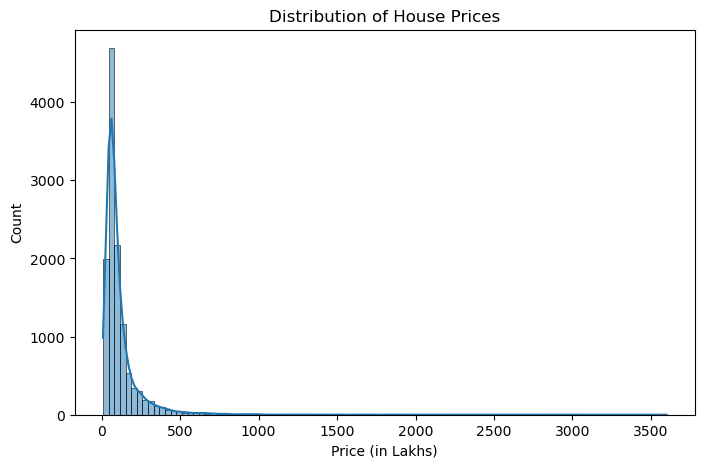

In [282]:
plt.figure(figsize=(8,5))
sns.histplot(data['price'], bins=100, kde=True)
plt.title('Distribution of House Prices')
plt.xlabel('Price (in Lakhs)')
plt.ylabel('Count')
plt.show()

histogram of house prices shows a right-skewed distribution, meaning most properties have lower prices, while a few high-priced properties are pushing the tail to the right.

#### Bivariate Analysis

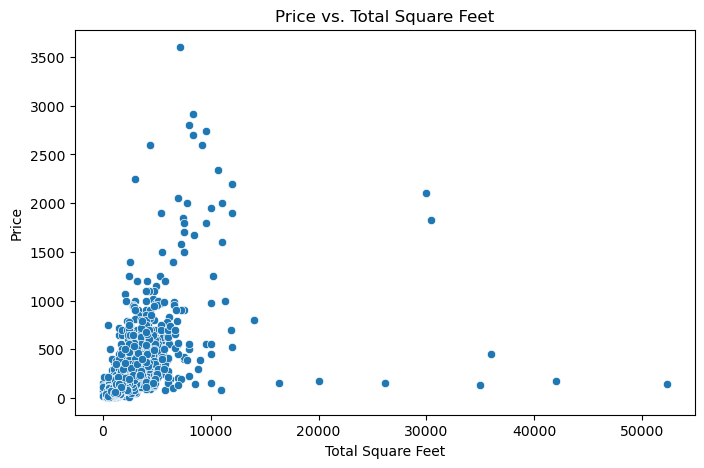

In [285]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=data['total_sqft'], y=data['price'])
plt.title('Price vs. Total Square Feet')
plt.xlabel('Total Square Feet')
plt.ylabel('Price')
plt.show()

* Majority of properties are clustered towards the lower square footage range (below 10,000 sqft) and lower price range
* There are extreme outliers with very high square footage (>20,000 sqft) and high prices, which might indicate luxury properties or the location has a key role in the price vs total square feet or errors in data entry.
  

#### Multivariate Analysis

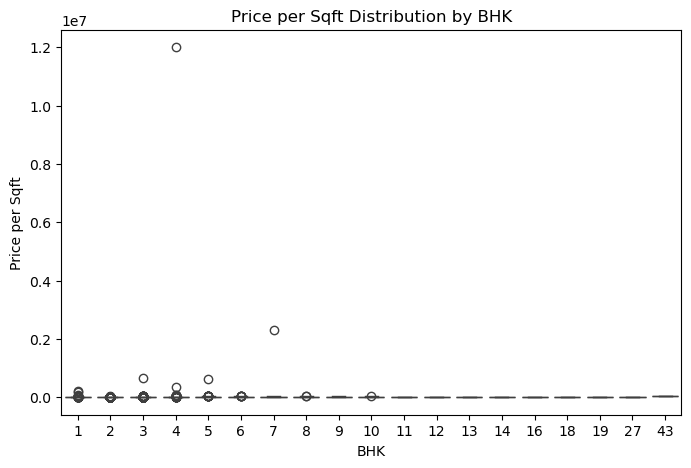

In [288]:
plt.figure(figsize=(8,5))
sns.boxplot(x=data['bhk'], y=data['price_per_sqft'])
plt.title('Price per Sqft Distribution by BHK')
plt.xlabel('BHK')
plt.ylabel('Price per Sqft')
plt.show()

* Extreme outliers – Some BHK values have significantly high price per sqft values, which might be errors or ultra-luxury properties.
* Most price per sqft values are concentrated near the lower end, indicating a relatively consistent price range for common BHK values.

## Handling Outliers

In [291]:
# Check skewness and kurtosis before transformation
data.select_dtypes(include=['number']).skew()

total_sqft         15.112123
bath                4.214944
price               7.915103
bhk                 4.838129
price_per_sqft    103.902032
dtype: float64

In [367]:
data.select_dtypes(include=['number']).kurtosis()


total_sqft          431.812583
bath                 61.383506
price               102.805501
bhk                  87.282864
price_per_sqft    11135.813068
dtype: float64

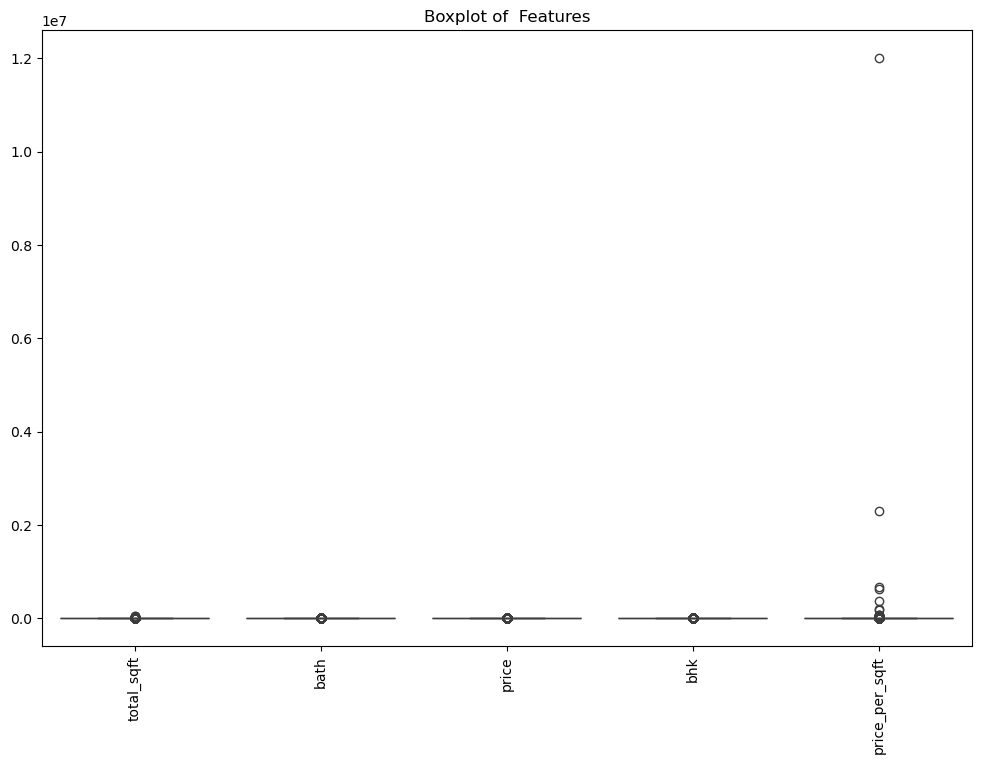

In [292]:
plt.figure(figsize=(12, 8))
sns.boxplot(data)
plt.xticks(rotation=90)
plt.title('Boxplot of  Features')
plt.show()

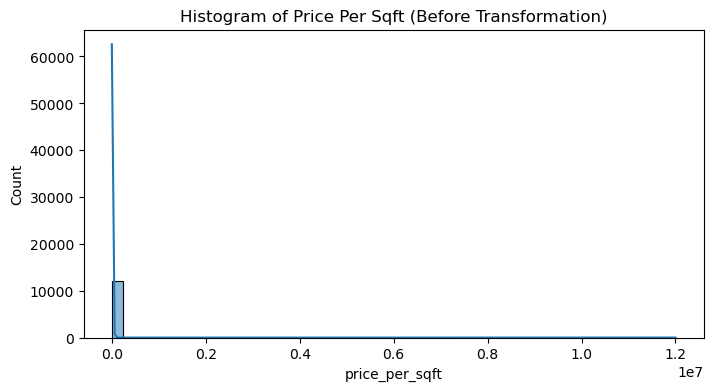

In [379]:
plt.figure(figsize=(8, 4))
sns.histplot(data['price_per_sqft'], kde=True, bins=50)
plt.title("Histogram of Price Per Sqft (Before Transformation)")
plt.show()

In [322]:
#IQR method for outlier removal
def remove_outliers(data,columns):
  data_filtered=data.copy()

  for column in columns:
     Q1 = data[column].quantile(0.05)
     Q3 = data[column].quantile(0.95)
     IQR = Q3 - Q1

     lower_bound = Q1 - 1.5 * IQR
     upper_bound = Q3 + 1.5* IQR

     data_filtered = data_filtered[(data_filtered[column] >= lower_bound) & (data_filtered[column] <= upper_bound)]

  return data_filtered

In [324]:
new_data=remove_outliers(data,['price_per_sqft','total_sqft','bath','price','bhk'])

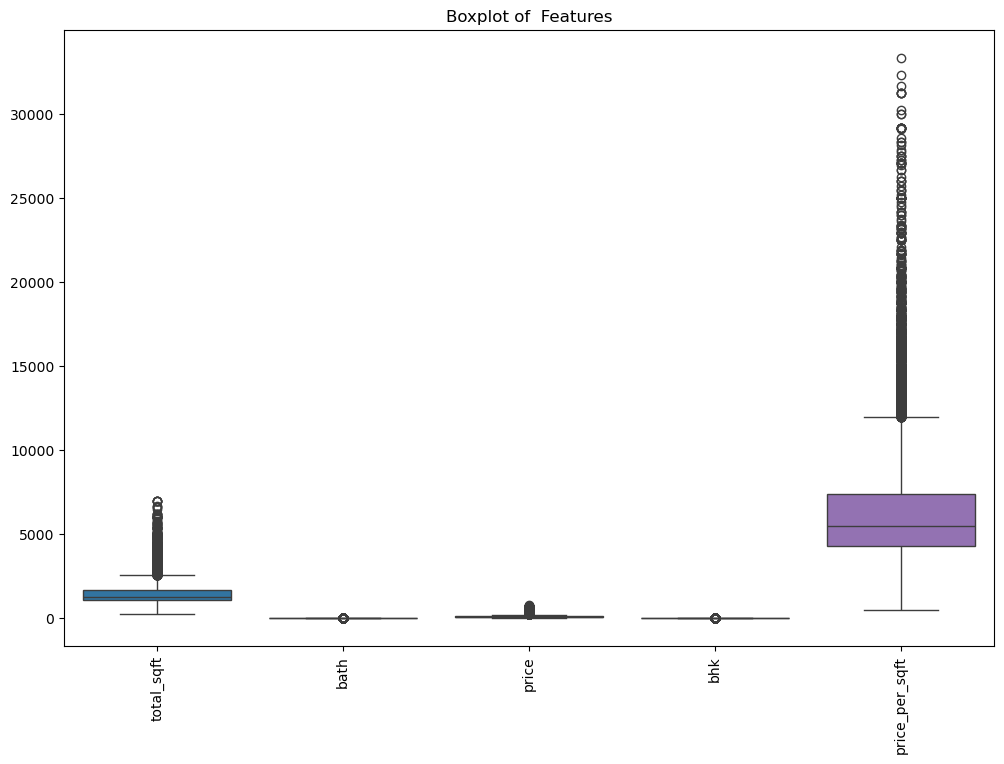

In [326]:
plt.figure(figsize=(12, 8))
sns.boxplot(new_data)
plt.xticks(rotation=90)
plt.title('Boxplot of  Features')
plt.show()

In [328]:
new_data.select_dtypes(include=['number']).skew()

total_sqft        2.316094
bath              1.910785
price             2.864145
bhk               1.903757
price_per_sqft    2.343573
dtype: float64

In [369]:
new_data.select_dtypes(include=['number']).kurtosis()

total_sqft         7.498006
bath               5.280141
price             10.416615
bhk                5.890973
price_per_sqft     7.116389
dtype: float64

In [330]:
data.shape

(12151, 7)

In [332]:
new_data.shape

(11989, 7)

As the data is not symmetrical going with one more IQR

In [335]:
new_data_1=remove_outliers(new_data,['price_per_sqft','total_sqft','bath','price','bhk'])

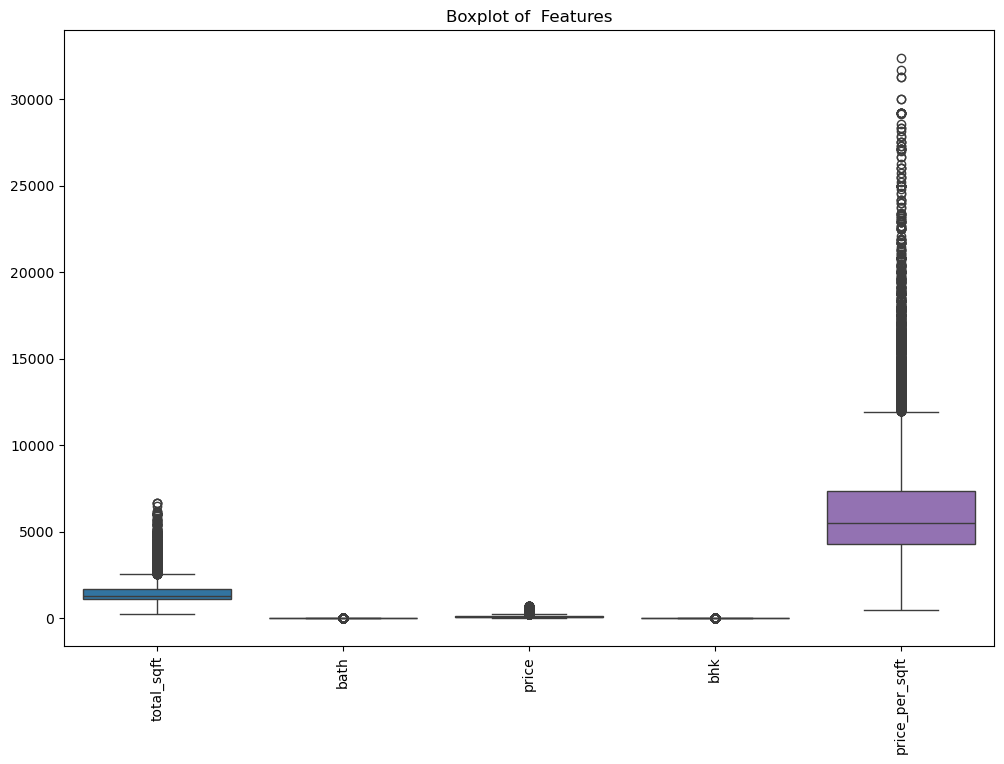

In [337]:
plt.figure(figsize=(12, 8))
sns.boxplot(new_data_1)
plt.xticks(rotation=90)
plt.title('Boxplot of  Features')
plt.show()

In [339]:
new_data_1.select_dtypes(include=['number']).skew()

total_sqft        2.226582
bath              1.910796
price             2.769013
bhk               1.908496
price_per_sqft    2.310579
dtype: float64

In [371]:
new_data_1.select_dtypes(include=['number']).kurtosis()

total_sqft        1.137112
bath              1.075495
price             0.349451
bhk               1.301131
price_per_sqft    0.690336
dtype: float64

In [341]:
new_data_1.shape

(11971, 7)

In [377]:
# Applying log transformation to skewed features
new_data_2= new_data_1.copy()

# Select only numeric columns for transformation
numeric_cols = ['price_per_sqft', 'total_sqft', 'bath', 'price', 'bhk']

# Apply log transformation only to the selected numeric columns
new_data_2[numeric_cols] = new_data_2[numeric_cols].apply(lambda x: np.log1p(x) if x.skew() > 1 or x.skew() < -1 else x)

print("\nSkewness after log transformation:")
print(new_data_2[numeric_cols].skew())
print("kurtosis value after transformation:\n",new_data_2[numeric_cols].kurtosis())


Skewness after log transformation:
price_per_sqft    0.757706
total_sqft        0.404592
bath              0.724446
price             0.579610
bhk               0.538256
dtype: float64
kurtosis value after transformation:
 price_per_sqft    0.690336
total_sqft        1.137112
bath              1.075495
price             0.349451
bhk               1.301131
dtype: float64


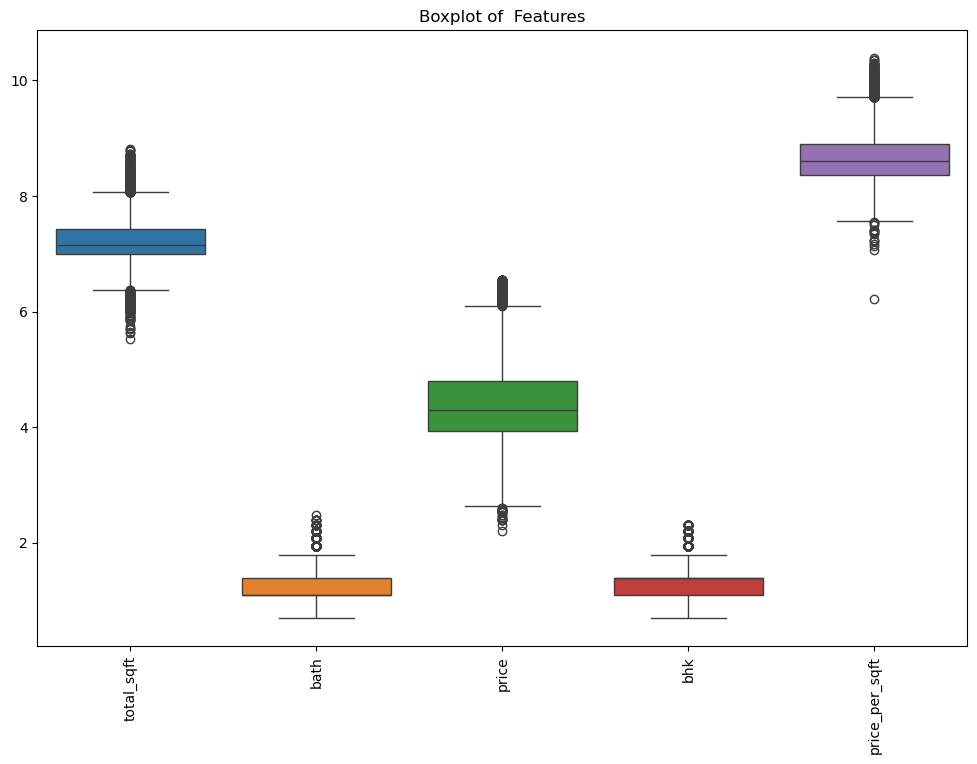

In [381]:
# boxplot after tranformation
plt.figure(figsize=(12, 8))
sns.boxplot(new_data_2)
plt.xticks(rotation=90)
plt.title('Boxplot of  Features')
plt.show()

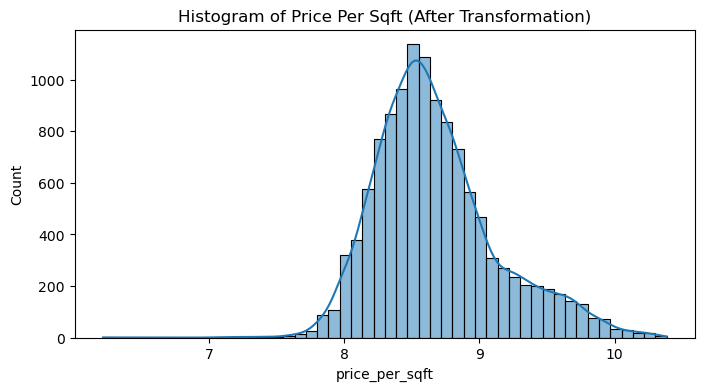

In [385]:
# histogram after transformation
plt.figure(figsize=(8, 4))
sns.histplot(new_data_2['price_per_sqft'], kde=True, bins=50)
plt.title("Histogram of Price Per Sqft (After Transformation)")
plt.show()

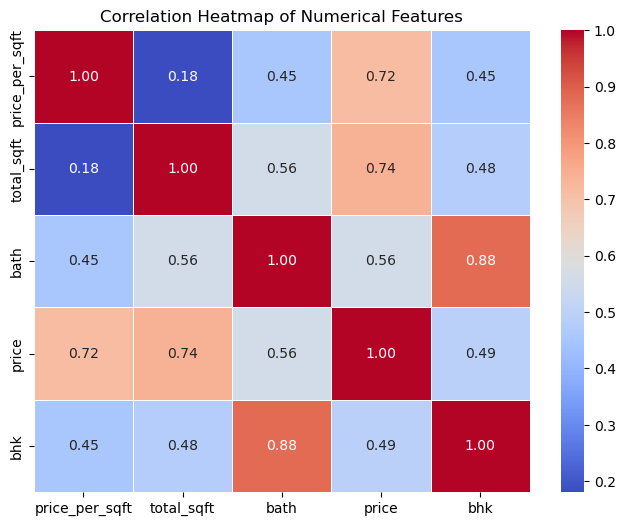

In [361]:
 # correlation between all the numerical columns(heatmap)
corr_matrix = new_data[numeric_cols].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

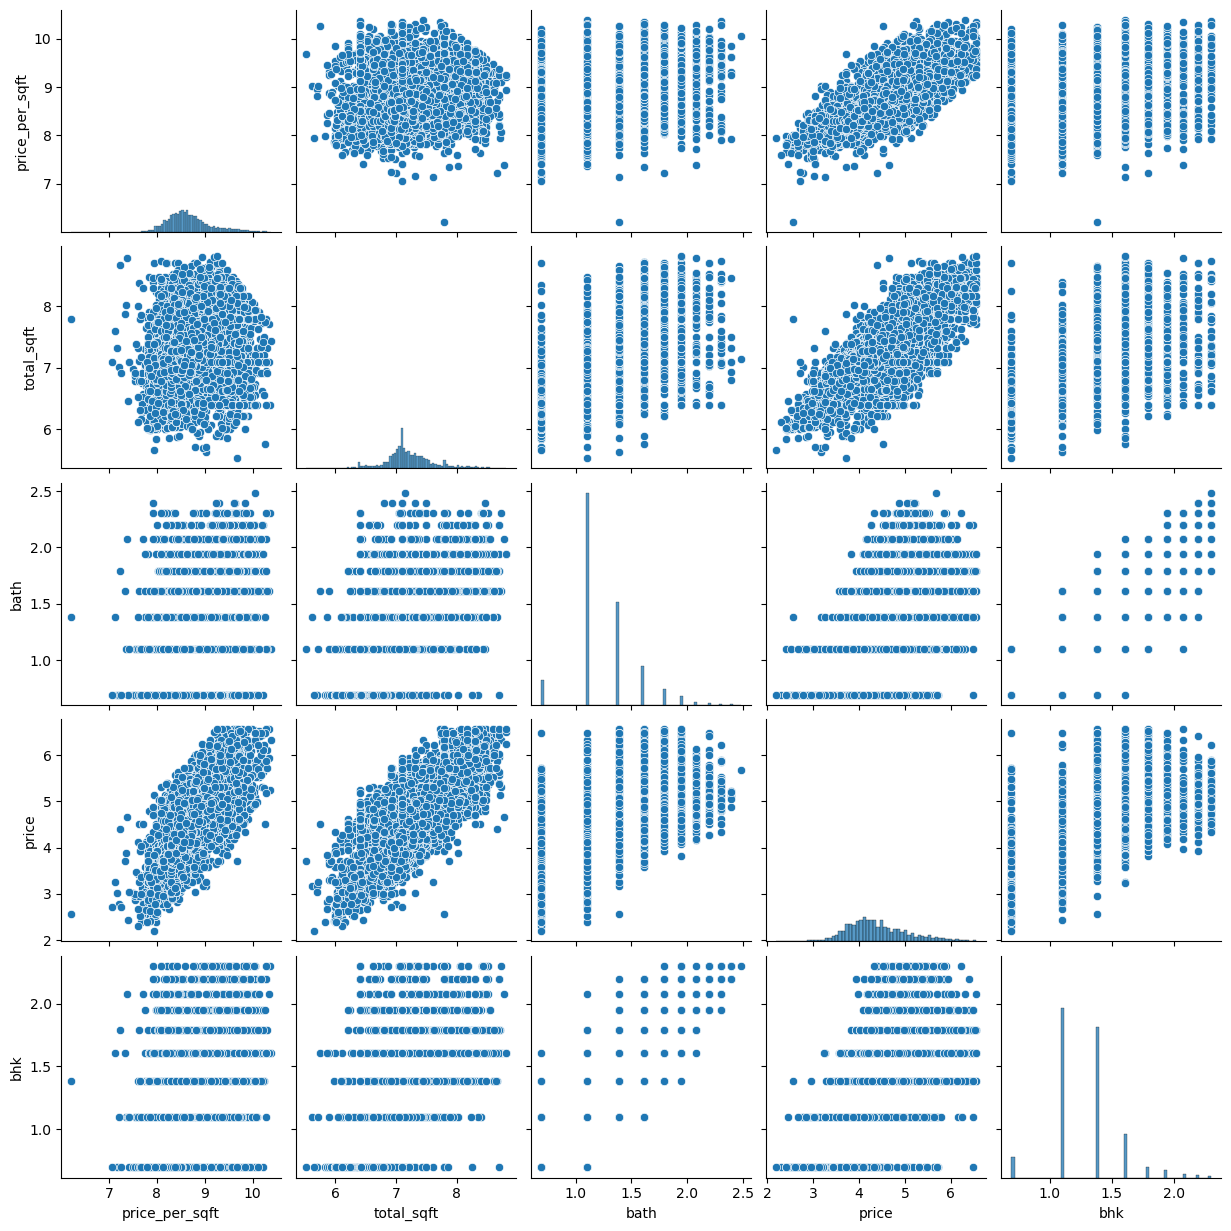

In [387]:
# pairplot to check correlation betweenthe variables
sns.pairplot(new_data_2[numeric_cols])
plt.show()